In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
# loading cleaned, merged data
ca_land_temp = pd.read_csv('ca_land_temp.csv')

#### Exploring California demographic features in Climate & Economic Justice Screening Tool data

In [32]:
main = pd.read_csv('ca_main.csv')
main.columns

Index(['census_tract_2010_id', 'county_name', 'state_territory',
       'percent_black_or_african_american_alone',
       'percent_american_indian___alaska_native', 'percent_asian',
       'percent_native_hawaiian_or_pacific', 'percent_two_or_more_races',
       'percent_white', 'percent_hispanic_or_latino', 'percent_other_races',
       'percent_age_under_10', 'percent_age_10_to_64', 'percent_age_over_64',
       'total_threshold_criteria_exceeded', 'total_categories_exceeded',
       'identified_as_disadvantaged_without_considering_neighbors',
       'identified_as_disadvantaged_based_on_neighbors_and_relaxed_low_income_threshold_only',
       'identified_as_disadvantaged', 'total_population',
       'adjusted_percent_of_individuals_below_200pct_federal_poverty_line_percentile',
       'adjusted_percent_of_individuals_below_200pct_federal_poverty_line',
       'is_low_income',
       'expected_agricultural_loss_rate_natural_hazards_risk_index',
       'expected_building_loss_rate_nat

**Correlations between demographic variables**

In [33]:
c = main[['percent_black_or_african_american_alone',
       'percent_american_indian___alaska_native', 'percent_asian',
       'percent_native_hawaiian_or_pacific', 'percent_two_or_more_races',
       'percent_white', 'percent_hispanic_or_latino', 'percent_other_races',
       'identified_as_disadvantaged', 'adjusted_percent_of_individuals_below_200pct_federal_poverty_line',
       'is_low_income', 'energy_burden', 'housing_burden_percent',
       'median_value_usd_of_owner-occupied_housing_units','life_expectancy_years', 'unemployment_percent',
       'percent_of_individuals_below_100pct_federal_poverty_line']].corr()
c

,percent_black_or_african_american_alone,percent_american_indian___alaska_native,percent_asian,percent_native_hawaiian_or_pacific,percent_two_or_more_races,percent_white,percent_hispanic_or_latino,percent_other_races,identified_as_disadvantaged,adjusted_percent_of_individuals_below_200pct_federal_poverty_line,is_low_income,energy_burden,housing_burden_percent,median_value_usd_of_owner-occupied_housing_units,life_expectancy_years,unemployment_percent,percent_of_individuals_below_100pct_federal_poverty_line
percent_black_or_african_american_alone,1.000000,-0.025564,-0.079148,0.099934,0.089182,-0.332020,0.040699,0.098810,0.143971,0.190504,0.155551,0.085053,0.263417,-0.169530,-0.303619,0.186236,0.222620
percent_american_indian___alaska_native,-0.025564,1.000000,-0.090007,0.005077,-0.008713,-0.025818,0.010357,0.000677,0.079944,0.128817,0.095801,0.143695,0.032931,-0.140034,-0.125499,0.088606,0.131907
percent_asian,-0.079148,-0.090007,1.000000,0.080581,0.070746,-0.235533,-0.341130,-0.187019,-0.093569,-0.310568,-0.240676,-0.309841,-0.141896,0.318958,0.348248,-0.184454,-0.201531
percent_native_hawaiian_or_pacific,0.099934,0.005077,0.080581,1.000000,0.084271,-0.107420,-0.014630,0.000818,0.027460,0.015052,0.010456,-0.002158,0.031739,-0.049423,-0.046961,0.024981,0.012066
percent_two_or_more_races,0.089182,-0.008713,0.070746,0.084271,1.000000,0.150594,-0.289075,-0.282009,-0.217882,-0.230859,-0.194891,-0.083353,-0.204823,0.047954,0.014609,0.007212,-0.136494
percent_white,-0.332020,-0.025818,-0.235533,-0.107420,0.150594,1.000000,-0.767704,-0.670033,-0.559992,-0.516316,-0.449920,-0.103330,-0.566790,0.359216,0.251561,-0.252271,-0.409446
percent_hispanic_or_latino,0.040699,0.010357,-0.341130,-0.014630,-0.289075,-0.767704,1.000000,0.779792,0.587921,0.656298,0.557559,0.263212,0.585627,-0.502632,-0.358442,0.304869,0.463395
percent_other_races,0.098810,0.000677,-0.187019,0.000818,-0.282009,-0.670033,0.779792,1.000000,0.501675,0.523693,0.447377,0.157642,0.527641,-0.328261,-0.252379,0.195581,0.367926
identified_as_disadvantaged,0.143971,0.079944,-0.093569,0.027460,-0.217882,-0.559992,0.587921,0.501675,1.000000,0.771689,0.809552,0.357897,0.645676,-0.414166,-0.392860,0.401248,0.611587
adjusted_percent_of_individuals_below_200pct_federal_poverty_line,0.190504,0.128817,-0.310568,0.015052,-0.230859,-0.516316,0.656298,0.523693,0.771689,1.000000,0.843254,0.513888,0.745983,-0.548581,-0.568878,0.479637,0.783781


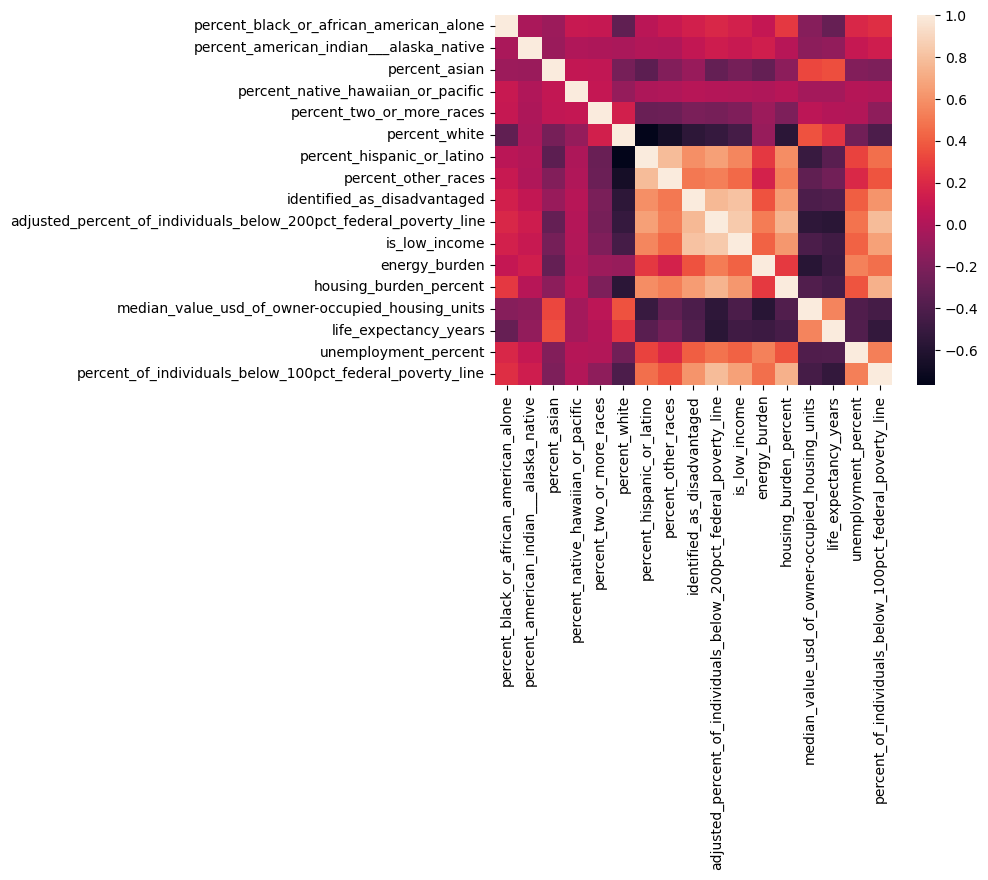

In [34]:
sns.heatmap(c)
pass

**Initial Insights**
- strongest negative correlation for most socioeconomic factors along the "percent white" line
- Some of these are binary categories.


**Graphs for further exploration of demographic variables**

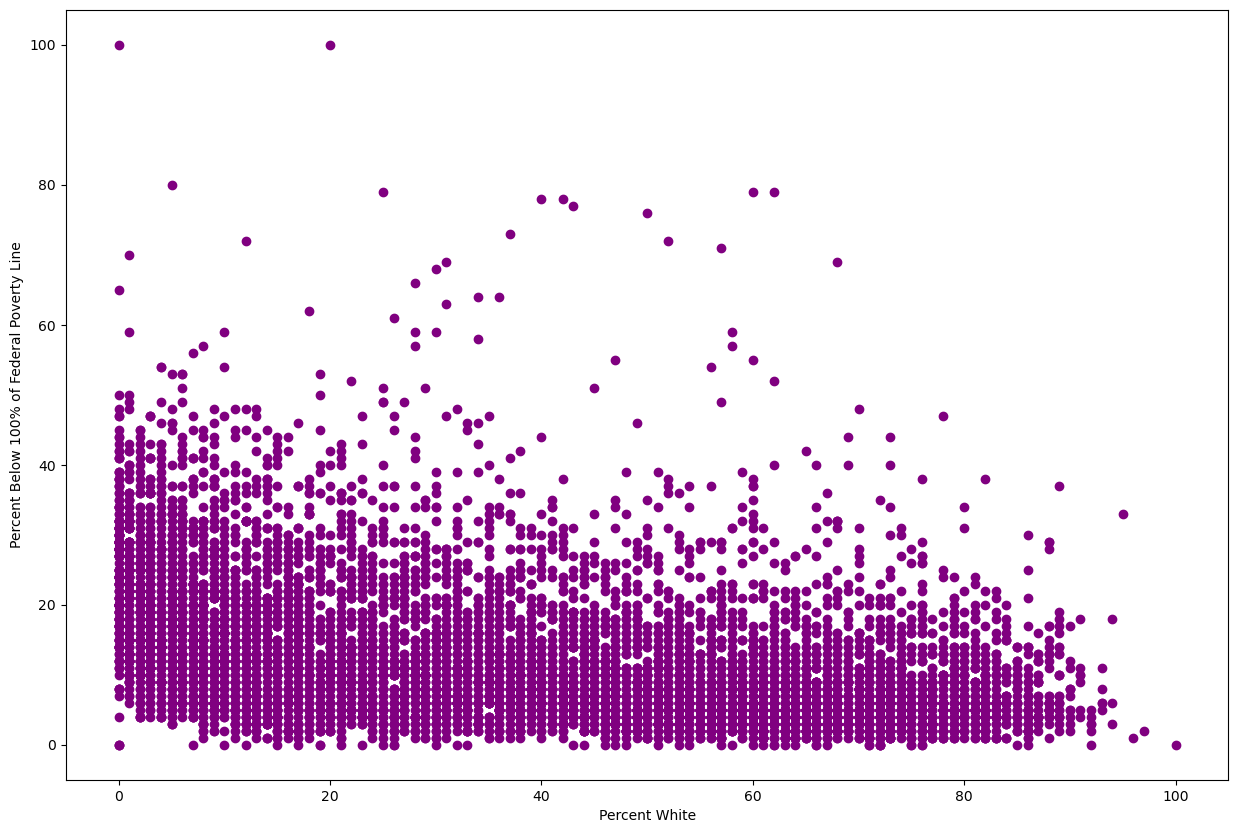

In [35]:
poverty_df = main[['percent_white', 'percent_of_individuals_below_100pct_federal_poverty_line']]
poverty_df = poverty_df.dropna()

x = poverty_df['percent_white'] * 100
y = poverty_df['percent_of_individuals_below_100pct_federal_poverty_line']

fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(x,y, color='purple')
ax.set_xlabel('Percent White')
ax.set_ylabel('Percent Below 100% of Federal Poverty Line')
pass

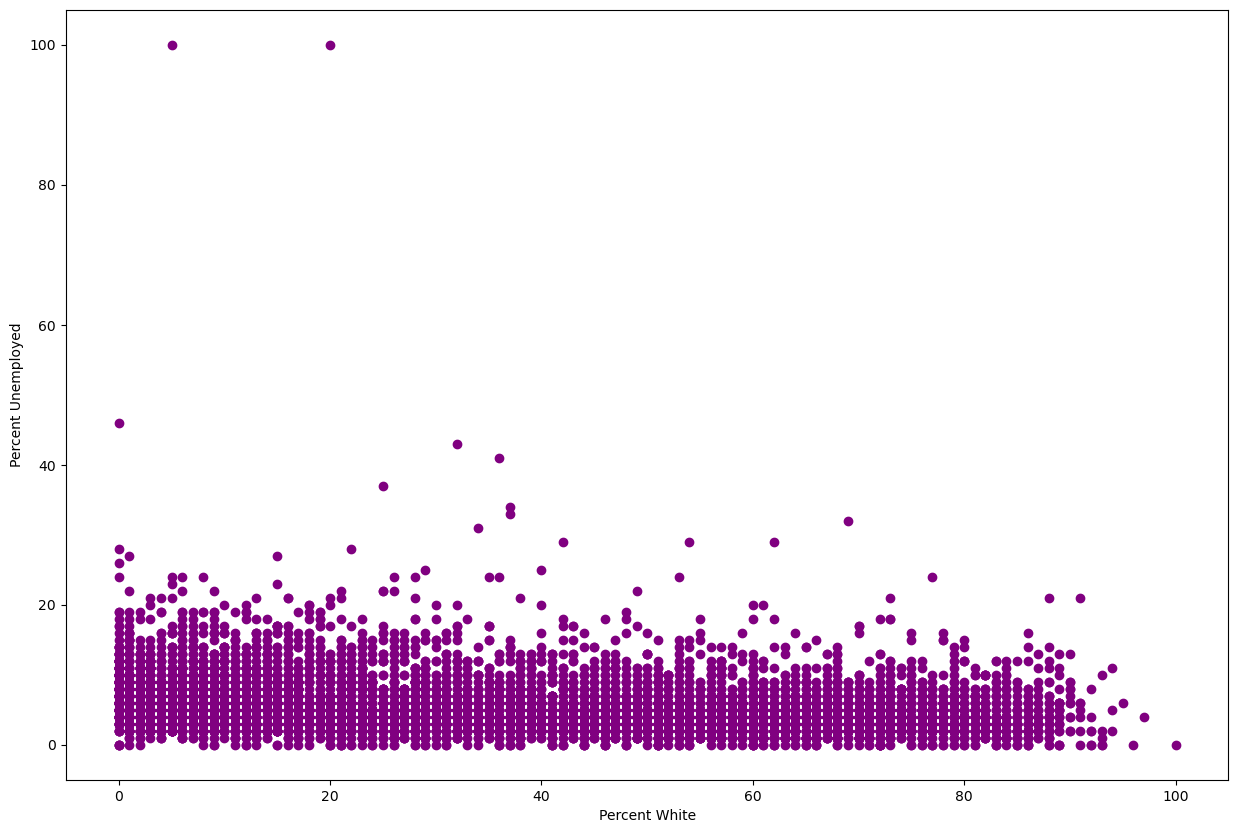

In [36]:
x = main['percent_white'] * 100
y = main['unemployment_percent']

fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(x,y, color='purple')
ax.set_xlabel('Percent White')
ax.set_ylabel('Percent Unemployed')
pass

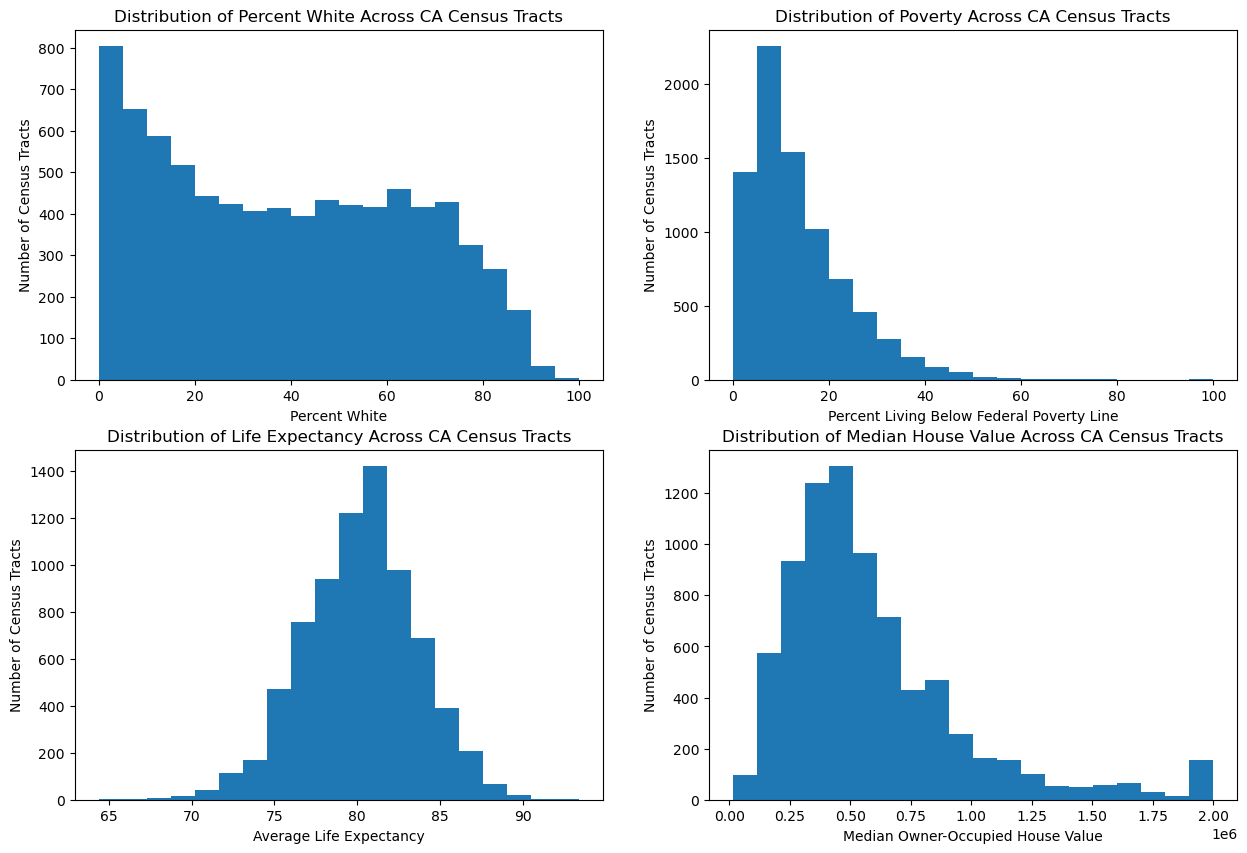

In [37]:
#distributions
fig, ax = plt.subplots(2, 2, figsize=(15,10))


ax[0][1].hist(main['percent_of_individuals_below_100pct_federal_poverty_line'], bins = 20)
ax[0][1].set_xlabel('Percent Living Below Federal Poverty Line')
ax[0][1].set_ylabel('Number of Census Tracts')
ax[0][1].set_title('Distribution of Poverty Across CA Census Tracts')

ax[0][0].hist(main['percent_white']*100, bins = 20)
ax[0][0].set_xlabel('Percent White')
ax[0][0].set_ylabel('Number of Census Tracts')
ax[0][0].set_title('Distribution of Percent White Across CA Census Tracts')

ax[1][0].hist(main['life_expectancy_years'], bins = 20)
ax[1][0].set_xlabel('Average Life Expectancy')
ax[1][0].set_ylabel('Number of Census Tracts')
ax[1][0].set_title('Distribution of Life Expectancy Across CA Census Tracts')

ax[1][1].hist(main['median_value_usd_of_owner-occupied_housing_units'], bins = 20)
ax[1][1].set_xlabel('Median Owner-Occupied House Value')
ax[1][1].set_ylabel('Number of Census Tracts')
ax[1][1].set_title('Distribution of Median House Value Across CA Census Tracts')
pass

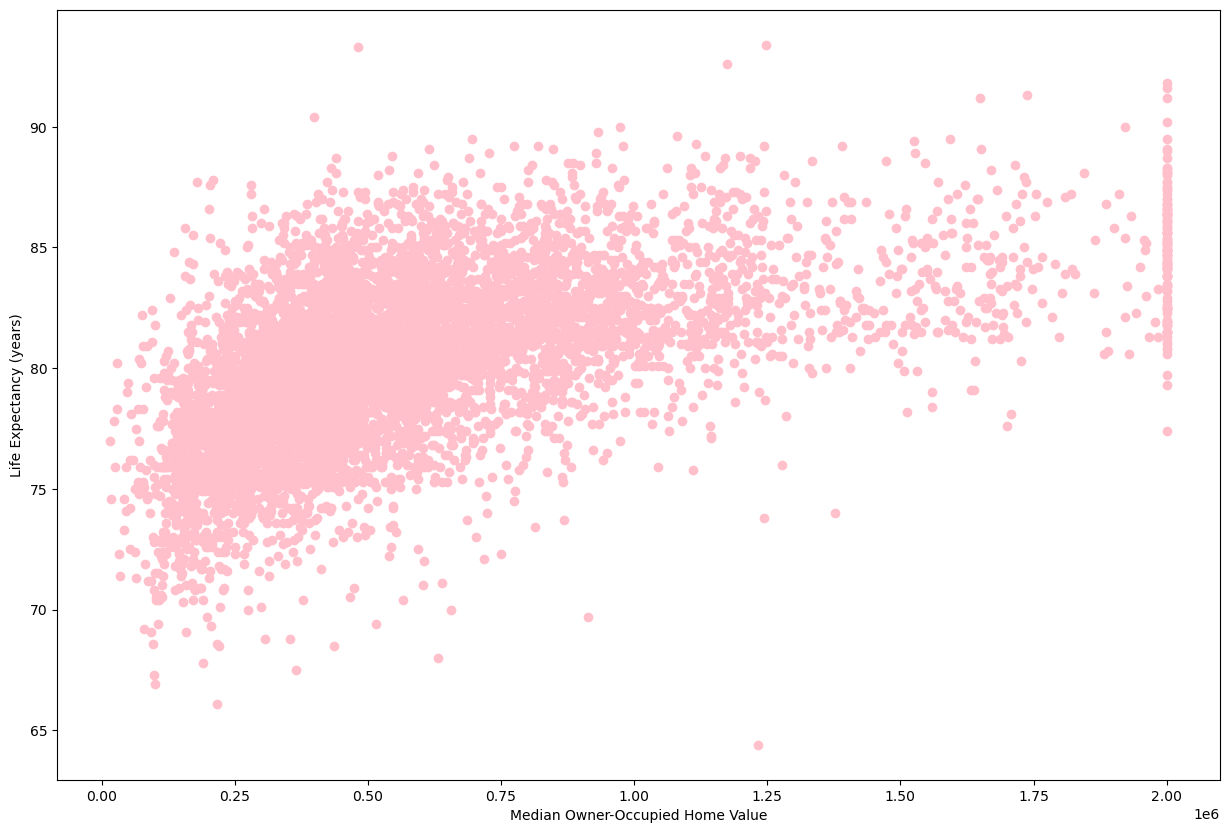

In [38]:
x = main['median_value_usd_of_owner-occupied_housing_units']
y = main['life_expectancy_years']

fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(x,y, color='pink')
ax.set_xlabel('Median Owner-Occupied Home Value')
ax.set_ylabel('Life Expectancy (years)')
#ax.set_xscale('log')
pass

**Grouping by disadvantaged status**

In [39]:
disadvantaged = main.groupby('identified_as_disadvantaged')[['percent_black_or_african_american_alone',
       'percent_american_indian___alaska_native', 'percent_asian',
       'percent_native_hawaiian_or_pacific', 'percent_two_or_more_races',
       'percent_white', 'percent_hispanic_or_latino', 'percent_other_races',
       'percent_age_under_10', 'percent_age_10_to_64', 'percent_age_over_64', 
       'adjusted_percent_of_individuals_below_200pct_federal_poverty_line', 
       'energy_burden', 'housing_burden_percent', 'median_value_usd_of_owner-occupied_housing_units',
       'life_expectancy_years', 'unemployment_percent',
       'percent_of_individuals_below_100pct_federal_poverty_line']]

In [49]:
disadvantaged.describe()

percent_black_or_african_american_alone            \
                                                              count      mean   
identified_as_disadvantaged                                                     
False                                                        4930.0  0.043822   
True                                                         3081.0  0.069594   

                                                                    \
                                  std  min   25%   50%   75%   max   
identified_as_disadvantaged                                          
False                        0.078811  0.0  0.00  0.02  0.05  0.84   
True                         0.096844  0.0  0.01  0.03  0.10  0.78   

                            percent_american_indian___alaska_native            \
                                                              count      mean   
identified_as_disadvantaged                                                     
False                                                        4930.0  0.003939   
True                                                         3081.0  0.007851   

                             ... unemployment_percent         \
                             ...                  75%    max   
identified_as_disadvantaged  ...                               
False                        ...                  6.0   46.0   
True                         ...                 10.0  100.0   

                            percent_of_individuals_below_100pct_federal_poverty_line  \
                                                                               count   
identified_as_disadvantaged                                                            
False                                                                   4912.0         
True                                                                    3072.0         

                                                                          \
                                  mean        std  min   25%   50%   75%   
identified_as_disadvantaged                                                
False                         8.208265   6.535930  0.0   4.0   7.0  11.0   
True                         21.258138  10.348129  0.0  14.0  20.0  27.0   

                                    
                               max  
identified_as_disadvantaged         
False                         79.0  
True                         100.0  

[2 rows x 144 columns]

**Grouping by county to find significant values based on differences in disadvantaged**

In [41]:
by_county = main.groupby('county_name')

In [42]:
perc_hispanic = by_county['percent_hispanic_or_latino'].mean()
perc_hispanic.sort_values(ascending=False).head()

county_name
Imperial County      0.768387
Tulare County        0.627949
Merced County        0.585510
San Benito County    0.570000
Kings County         0.547407
Name: percent_hispanic_or_latino, dtype: float64

In [43]:
perc_white = by_county['percent_white'].mean()
perc_white.sort_values(ascending=False).head()

county_name
Sierra County       0.870000
Nevada County       0.856000
Plumas County       0.847143
Calaveras County    0.838000
Trinity County      0.816000
Name: percent_white, dtype: float64

In [44]:
median_house = by_county['median_value_usd_of_owner-occupied_housing_units'].mean()
median_house.sort_values(ascending=False).head()

county_name
San Mateo County        1.204862e+06
San Francisco County    1.179213e+06
Marin County            1.111072e+06
Santa Clara County      1.060132e+06
Alameda County          7.624885e+05
Name: median_value_usd_of_owner-occupied_housing_units, dtype: float64

In [46]:
median_house.sort_values(ascending=True).head()

county_name
Modoc County       154250.000000
Imperial County    180876.666667
Siskiyou County    187685.714286
Kern County        194067.586207
Tulare County      196888.311688
Name: median_value_usd_of_owner-occupied_housing_units, dtype: float64

In [48]:
perc_poverty = by_county['adjusted_percent_of_individuals_below_200pct_federal_poverty_line'].mean()
perc_poverty.sort_values(ascending=False).head()

county_name
Del Norte County    0.435714
Tulare County       0.431154
Modoc County        0.420000
Imperial County     0.402258
Trinity County      0.398000
Name: adjusted_percent_of_individuals_below_200pct_federal_poverty_line, dtype: float64

#### Exploring temperature over time in CA

In [16]:
# importing full temperature dataset

temp = pd.read_excel('../data/county_IPUMS_temp_2015.xlsx',
                     sheet_name='US_county_2015_annualtmean')

# adding GEOID
temp['merge_id_county'] = temp['GISJOIN'].str[1:3] + temp['GISJOIN'].str[4:7]
temp.head()

,OID,GISJOIN,MIN,MAX,MEAN,STD,TIME,merge_id_county
0,-1,G0100010,16.631250,18.212917,17.489999,0.371792,1895,01001
1,-1,G0100030,17.777918,19.268333,18.744056,0.251879,1895,01003
2,-1,G0100050,17.525000,18.368750,17.978815,0.206684,1895,01005
3,-1,G0100070,16.640417,16.922083,16.785199,0.059117,1895,01007
4,-1,G0100090,14.835000,15.684167,15.161619,0.195363,1895,01009


In [17]:
#filtering to CA

temp_ca = temp[temp['merge_id_county'].str[:2] == '06']
temp_ca.shape

(6960, 8)

In [18]:
#converting to fahrenheit

temp_ca.loc[:, 'MEAN_TEMP_F'] = (temp_ca['MEAN']*(9/5))+32
temp_ca.head()

/var/folders/dn/ky4p5fs5503dnjp3zlgz596w0000gn/T/ipykernel_29454/3348439777.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_ca.loc[:, 'MEAN_TEMP_F'] = (temp_ca['MEAN']*(9/5))+32


,OID,GISJOIN,MIN,MAX,MEAN,STD,TIME,merge_id_county,MEAN_TEMP_F
157,-1,G0600010,12.375417,15.101666,13.663950,0.384863,1895,06001,56.595110
158,-1,G0600030,1.272500,8.960417,4.964594,1.501235,1895,06003,40.936269
159,-1,G0600050,3.746667,15.434999,12.884497,3.127159,1895,06005,55.192095
160,-1,G0600070,6.495417,16.010834,14.296093,2.192675,1895,06007,57.732967
161,-1,G0600090,6.393333,15.326250,13.343948,2.098974,1895,06009,56.019106


In [19]:
# limit to just cols of interest
temp_ca_cols = temp_ca.loc[:, ['MIN', 'MAX',
                               'MEAN', 'MEAN_TEMP_F', 'STD', 'TIME']]
temp_ca_cols.head()

,MIN,MAX,MEAN,MEAN_TEMP_F,STD,TIME
157,12.375417,15.101666,13.663950,56.595110,0.384863,1895
158,1.272500,8.960417,4.964594,40.936269,1.501235,1895
159,3.746667,15.434999,12.884497,55.192095,3.127159,1895
160,6.495417,16.010834,14.296093,57.732967,2.192675,1895
161,6.393333,15.326250,13.343948,56.019106,2.098974,1895


In [20]:
# group by year
ca_temp_yr = temp_ca_cols.groupby('TIME').mean()
ca_temp_yr = ca_temp_yr.reset_index()
ca_temp_yr.head()

,TIME,MIN,MAX,MEAN,MEAN_TEMP_F,STD
0,1895,7.622543,15.604461,12.986695,55.376050,1.694868
1,1896,7.828664,16.070604,13.347310,56.025158,1.767931
2,1897,7.425740,15.531976,12.868366,55.163058,1.728552
3,1898,7.627565,15.575079,12.996790,55.394221,1.686164
4,1899,7.350402,15.691207,12.981466,55.366639,1.777162


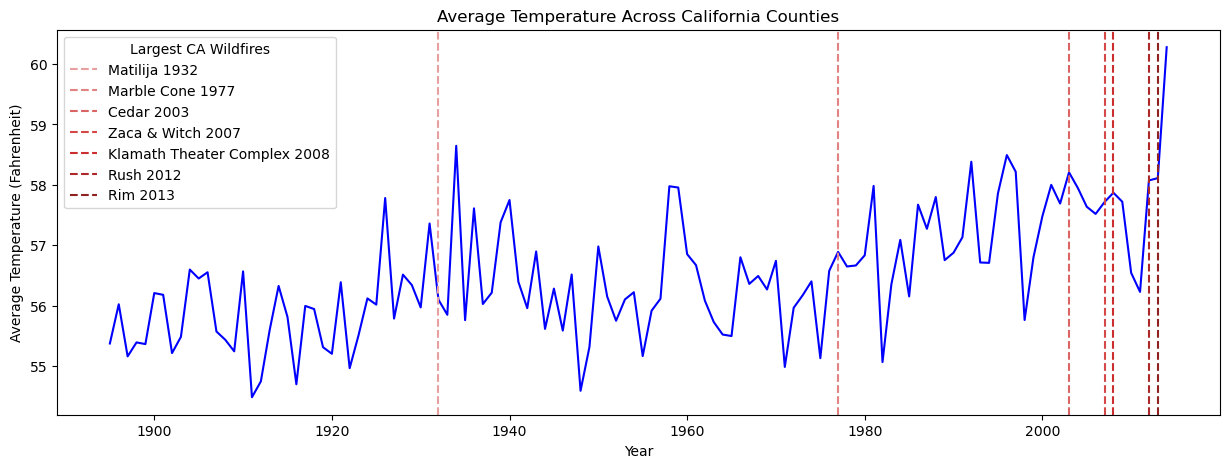

In [21]:
# plotting temperatures

fig, axes = plt.subplots(figsize=(15, 5))

# plotting the lines
# , label = 'Average Temperature')
axes.plot(ca_temp_yr['TIME'], ca_temp_yr['MEAN_TEMP_F'], 'b')

# # adding linear trend line - exclude, makes visual too busy
# slope, intercept = np.polyfit(ca_temp_yr['TIME'], ca_temp_yr['MEAN_TEMP_F'], 1)
# trend_line = slope * ca_temp_yr['TIME'] + intercept
# plt.plot(ca_temp_yr['TIME'], trend_line, label='Linear Trend Line', linestyle='dotted', color='red')

# labels
plt.ticklabel_format(style='plain', axis='y', useOffset=False)
axes.axvline(1932, color='#e89f9f', linestyle='dashed', label='Matilija 1932')
axes.axvline(1977, color='#e28282', linestyle='dashed',
             label='Marble Cone 1977')
axes.axvline(2003, color='#db6565', linestyle='dashed', label='Cedar 2003')
axes.axvline(2007, color='#d44848', linestyle='dashed',
             label='Zaca & Witch 2007')
axes.axvline(2008, color='#ca2e2e', linestyle='dashed',
             label='Klamath Theater Complex 2008')
axes.axvline(2012, color='#ad2828', linestyle='dashed', label='Rush 2012')
axes.axvline(2013, color='#902121', linestyle='dashed', label='Rim 2013')

axes.legend(title='Largest CA Wildfires')
axes.set_xlabel('Year')
axes.set_ylabel('Average Temperature (Fahrenheit)')
axes.set_title('Average Temperature Across California Counties')
plt.show()

### Green Space analysis 

In [22]:
green_space = ca_land_temp.loc[:, ['tract_covered_impervious_surface_cropland',
                                   'percentile_tract_covered_impervious_surface_cropland', 'developed_open_space_area21', 'developed_low_intensity_area22',
                                   'developed_med_intensity_area23', 'developed_high_intensity_area24',
                                   'developed_open_space_prop21', 'developed_low_intensity_prop22',
                                   'developed_med_intensity_prop23', 'developed_high_intensity_prop24']]
green_space.head()

,tract_covered_impervious_surface_cropland,percentile_tract_covered_impervious_surface_cropland,developed_open_space_area21,developed_low_intensity_area22,developed_med_intensity_area23,developed_high_intensity_area24,developed_open_space_prop21,developed_low_intensity_prop22,developed_med_intensity_prop23,developed_high_intensity_prop24
0,1051.0,13.0,2162700.0,620100.0,204300.0,36000.0,0.313749,0.089960,0.029638,0.005223
1,5380.0,72.0,66600.0,193500.0,269100.0,55800.0,0.113846,0.330769,0.460000,0.095385
2,6803.0,87.0,6300.0,124200.0,768600.0,205200.0,0.005705,0.112469,0.696007,0.185819
3,5894.0,78.0,9000.0,197100.0,454500.0,54000.0,0.012594,0.275819,0.636020,0.075567
4,6574.0,85.0,27000.0,54900.0,433800.0,75600.0,0.045662,0.092846,0.733638,0.127854


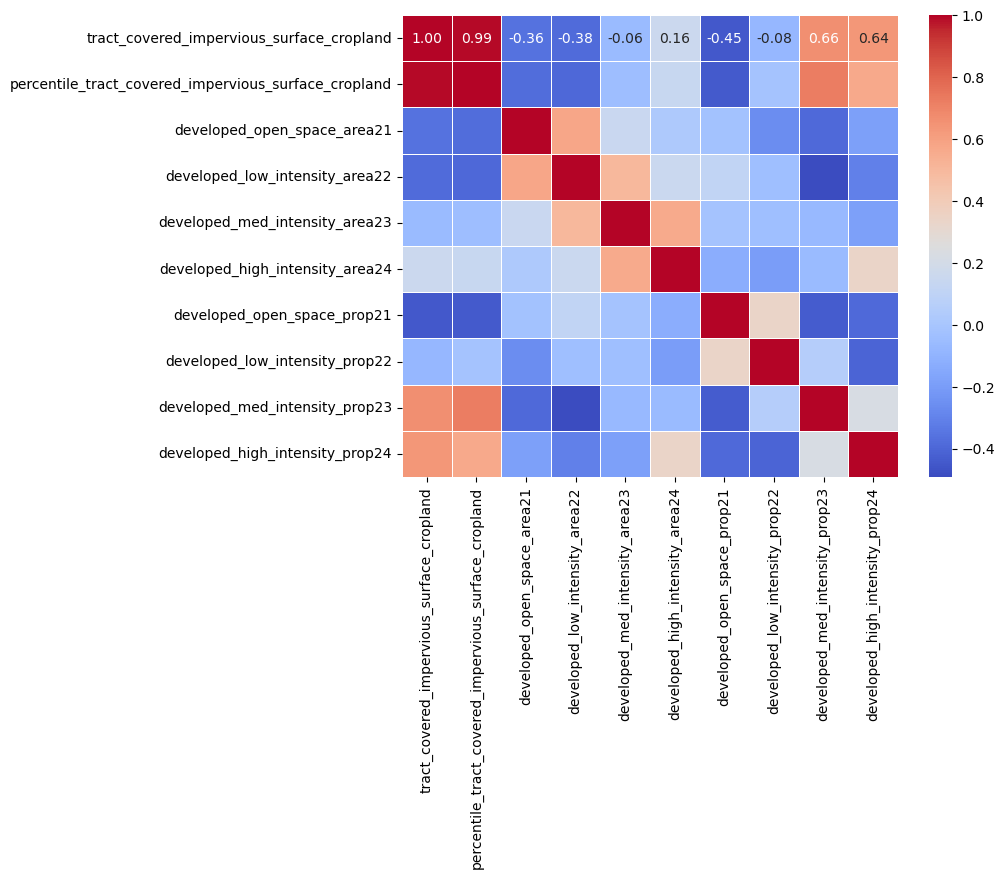

In [23]:
# Calculate the correlation matrix
correlation_matrix = green_space.corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Create a heatmap using seaborn to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True,
            cmap='coolwarm', fmt='.2f', linewidths=.5)

# Display the plot
plt.show()